# Exercise on data visualisation based on a Barcelona data set

I made this exercise to put in practice some of the things I have learnt in a couple fo courses I took on using Python for data analysis and visualisation. I thought it could be be beneficial to some other people, and therefore I am sharing this jupyter notebook.
The Barcelona data set I used can be found in Kaggle:
https://www.kaggle.com/xvivancos/barcelona-data-sets.

In [540]:
import sys
print (sys.version)
#import os
#print (os.environ)

3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [541]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dataset_folder='/Users/federicoboccardi/Documents/DL and data science/datasets/barcelona-data-sets/'
palette_style='viridis'

## Load and clean the data

### load the csv file and copy it in a DataFrame
To load the dataset from a file I use the pd.read_csv() panda static method. Then I create a dataframe, giving as an input to the DataFrame method the dataset.

In [542]:
bcn_ds_1=pd.read_csv(dataset_folder+'immigrants_by_nationality.csv')
brc_nationalities_df = pd.DataFrame(bcn_ds_1)
brc_nationalities_df.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663


### A bit of data cleaning 
I change the neighborhood names in lower case, remove "el " or "la " at the beginning and I shorten the names. This will be useful later, because the different datasets I have found on Barcelona use slightly different names for the naighborhoods.

In [543]:
for i in np.arange(0,len(bcn_ds_1.index)):
    brc_nationalities_df.at[i,"Neighborhood Name"]=brc_nationalities_df.at[i,"Neighborhood Name"].lower()
    if brc_nationalities_df.at[i,"Neighborhood Name"][0:3]=='la ' or  brc_nationalities_df.at[i,"Neighborhood Name"][0:3]=='el ':
        brc_nationalities_df.at[i,"Neighborhood Name"]=brc_nationalities_df.at[i,"Neighborhood Name"][3:-1]
    brc_nationalities_df.at[i,"Neighborhood Name"]=brc_nationalities_df.at[i,"Neighborhood Name"][0:10]

brc_nationalities_df.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,rava,Spain,1109
1,2017,1,Ciutat Vella,2,barri gòti,Spain,482
2,2017,1,Ciutat Vella,3,barcelonet,Spain,414
3,2017,1,Ciutat Vella,4,"sant pere,",Spain,537
4,2017,2,Eixample,5,fort pien,Spain,663


## Create a barplot of the number of immigrants by nationalities: focus on pandas and seaborn 
The objective of this section is to familiarise with groupby and seaborn 

### Introduce the groupby class
Use groupby to count the number of immigrants by nationality and sort it in ascending order.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [544]:
brc_nationalities_df_grp_by_nationality=brc_nationalities_df.groupby('Nationality')
ascending_nationality_series=brc_nationalities_df_grp_by_nationality['Number'].sum().sort_values(ascending=False)
#I create a new series, where I remove Spain, I take the top 20 and all the others below the top 20 fall under 'others'
top20=pd.Series(ascending_nationality_series[1:20])
top20=top20.append(pd.Series(sum(ascending_nationality_series[21:].values),['Others']))

### Plot the graphs using seaborn
https://seaborn.pydata.org

Text(0.5, 1.0, 'Number of immigrants by nationality (top 20) in 2015-2017, excluding Spanish immigrants')

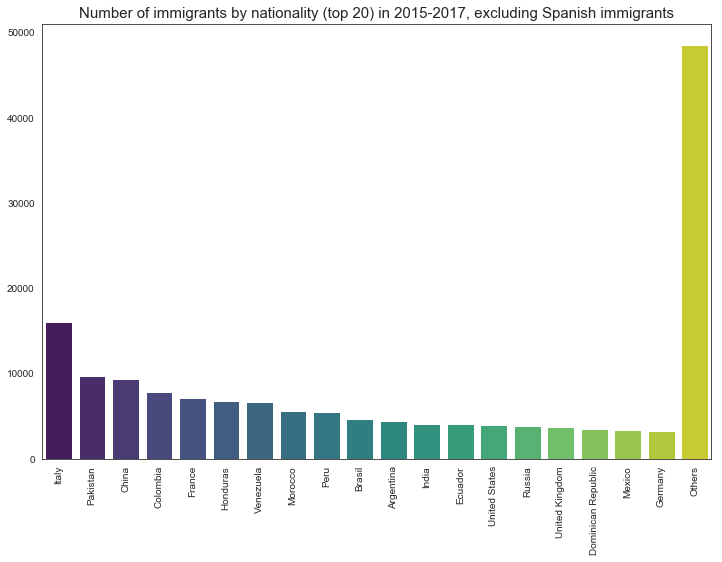

In [545]:
plt.figure(figsize=(12,8))
sns.set_style('white')
plot1=sns.barplot(top20.index,top20.values,palette=palette_style)


for item in plot1.get_xticklabels():
    item.set_rotation(90)
plot1.set_title('Number of immigrants by nationality (top 20) in 2015-2017, excluding Spanish immigrants',fontdict={'fontsize': '15'})

## Visualise how migration varies for each district: focus on pandas and matplotlib
The objective of this section is to familiarise with manipulating DataFrames and using the matplotlib class (https://matplotlib.org).

### Load the bus dataset to find out longitute and latitude for each distric name

In [546]:
bcn_ds_2=pd.read_csv(dataset_folder+'bus_stops.csv')
brc_bus_stop_df = pd.DataFrame(bcn_ds_2)
brc_bus_stop_df.head()

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià


### A bit of data cleaning
Same as above.

In [547]:
for i in np.arange(0,len(brc_bus_stop_df.index)):
    brc_bus_stop_df.at[i,"Neighborhood.Name"]=str(brc_bus_stop_df.at[i,"Neighborhood.Name"]).lower()
    if brc_bus_stop_df.at[i,"Neighborhood.Name"][0:3]=='la ' or  brc_bus_stop_df.at[i,"Neighborhood.Name"][0:3]=='el ':
        brc_bus_stop_df.at[i,"Neighborhood.Name"]=brc_bus_stop_df.at[i,"Neighborhood.Name"][3:-1]
    brc_bus_stop_df.at[i,"Neighborhood.Name"]=brc_bus_stop_df.at[i,"Neighborhood.Name"][0:10]

brc_bus_stop_df.head()

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,guinard
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,vallcarca
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,font d'en
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,font d'en
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,sarrià


### Use groupby to manipulate the data

First I group by district name

In [548]:
brc_bus_stop_df_grp_by_districtname=brc_bus_stop_df.groupby('District.Name')
XDN=brc_bus_stop_df_grp_by_districtname['Longitude'].mean()
YDN=brc_bus_stop_df_grp_by_districtname['Latitude'].mean()
brc_nationalities_df_grp_by_districtname=brc_nationalities_df.groupby('District Name')
ZDN=brc_nationalities_df_grp_by_districtname['Number'].sum()
LDN=brc_bus_stop_df_grp_by_districtname['District.Name'].first()
ZDN=ZDN.drop(['No consta'])

Second I group by neighborhood

In [549]:
brc_bus_stop_df_grp_by_neighborhood=brc_bus_stop_df.groupby('Neighborhood.Name')
X=brc_bus_stop_df_grp_by_neighborhood['Longitude'].mean()
Y=brc_bus_stop_df_grp_by_neighborhood['Latitude'].mean()
brc_nationalities_df_grp_by_neighborhood=brc_nationalities_df.groupby('Neighborhood Name')
Z=brc_nationalities_df_grp_by_neighborhood['Number'].sum()
L=brc_bus_stop_df_grp_by_neighborhood['Neighborhood.Name'].first()

### Scatter plot of the immigration size for each district using the matplotlib class

Text(0.5, 1.0, 'Number of immigrants by barrio in 2015-2017')

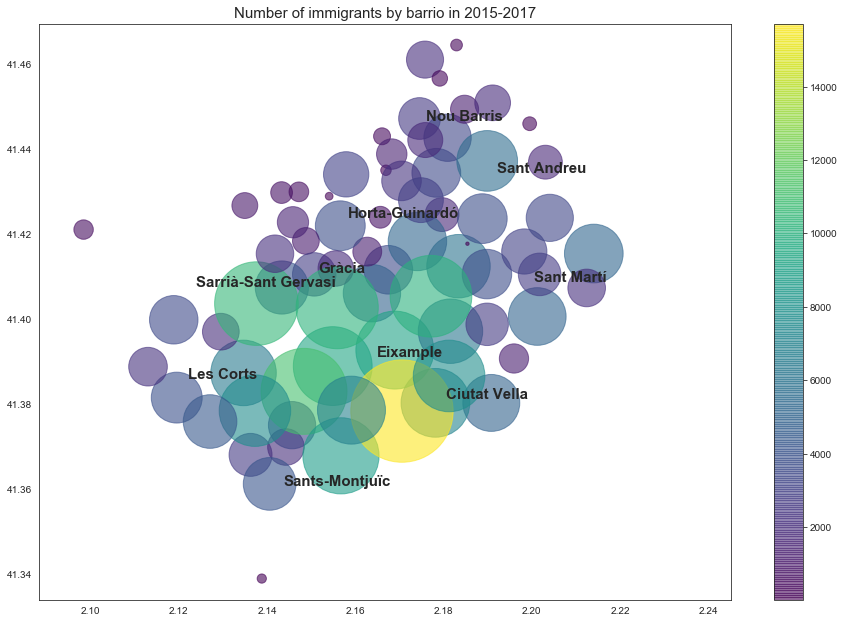

In [550]:
fig=plt.figure(figsize=(12,8))#create a figure object
axes=fig.add_axes([0,0,1,1])
a=axes.scatter(X, Y, Z/1.5, alpha=0.6,c=Z,cmap='viridis')
axes.set_xbound(min(X)-0.01, max(X)+0.031)
axes.set_ybound(min(Y)-0.005, max(Y)+0.005)
for i in np.arange(0,len(ZDN)):
     axes.annotate(LDN[i], (XDN[i], YDN[i]),size=15,fontweight='bold')
#for i in np.arange(0,len(Z)):
#     axes.annotate(L[i], (X[i], Y[i]),size=9)
cbar = fig.colorbar(a, orientation='vertical')
axes.set_title('Number of immigrants by barrio in 2015-2017' , fontdict={'fontsize': '15'})

## Visualise immigration intensity on a choropleth map: focus on geopandas
The aim of this section is to familiarise with geopandas: http://geopandas.org.
See also the excellent tutorial in: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d.

### Load geojson figure as geopandas dataframe

In [551]:
bcn_geopandas_df=gpd.read_file('barcelona-neighborhoods.geojson')
bcn_geopandas_df.head()

,name,geometry
0,El Camp d'en Grassot i Gràcia Nova,"POLYGON ((2.166184186935425 41.40172470189383,..."
1,Pedralbes,"POLYGON ((2.129416465759277 41.39237673632034,..."
2,Dreta de l'Eixample,"POLYGON ((2.175883054733276 41.38893177463785,..."
3,La Barceloneta,"POLYGON ((2.188623547554016 41.36549636287175,..."
4,Vallvidrera el Tibidabo i les Planes,"POLYGON ((2.108194828033447 41.41201275052313,..."


### A bit of data cleaning
Same as above.

In [552]:
for i in np.arange(0,len(bcn_geopandas_df)):
    bcn_geopandas_df.at[i,"name"]=bcn_geopandas_df.at[i,"name"].lower()
    if bcn_geopandas_df.at[i,"name"][0:3]=='la ' or  bcn_geopandas_df.at[i,"name"][0:3]=='el ':
        bcn_geopandas_df.at[i,"name"]=bcn_geopandas_df.at[i,"name"][3:-1]
    bcn_geopandas_df.at[i,"name"]=bcn_geopandas_df.at[i,"name"][0:10]
bcn_geopandas_df.head()

,name,geometry
0,camp d'en,"POLYGON ((2.166184186935425 41.40172470189383,..."
1,pedralbes,"POLYGON ((2.129416465759277 41.39237673632034,..."
2,dreta de l,"POLYGON ((2.175883054733276 41.38893177463785,..."
3,barcelonet,"POLYGON ((2.188623547554016 41.36549636287175,..."
4,vallvidrer,"POLYGON ((2.108194828033447 41.41201275052313,..."


This is how it looks like

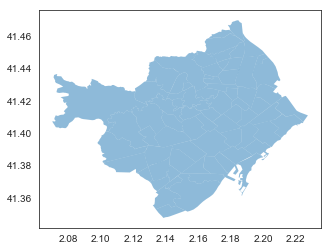

In [553]:
bcn_geopandas_df.plot(figsize=(6, 4), alpha=0.5, edgecolor='')

### Add a new column in the geopanda dataframe 
This to add the information about immigration intensity for each neighborhood. Note that some of the neighborhoods are called in a different way in the different datasets, hence there are some imperfections. I could have fixed it manually, but the purpose of this work is to get familiar with the tools rather than achieving a publication-ready result.

In [554]:
bcn_geopandas_df['number_of_immigrants']=pd.Series(np.zeros(len(bcn_geopandas_df)), index=bcn_geopandas_df.index)
for i in np.arange(0,len(bcn_geopandas_df)):
    try: 
        bcn_geopandas_df.at[i,'number_of_immigrants']=Z[bcn_geopandas_df.at[i,'name']]
    except:
        bcn_geopandas_df['number_of_immigrants'][i]= 0

### Plot the choropleth map

Text(0.5, 1.0, 'Number of immigrants by barrio in 2015-2017')

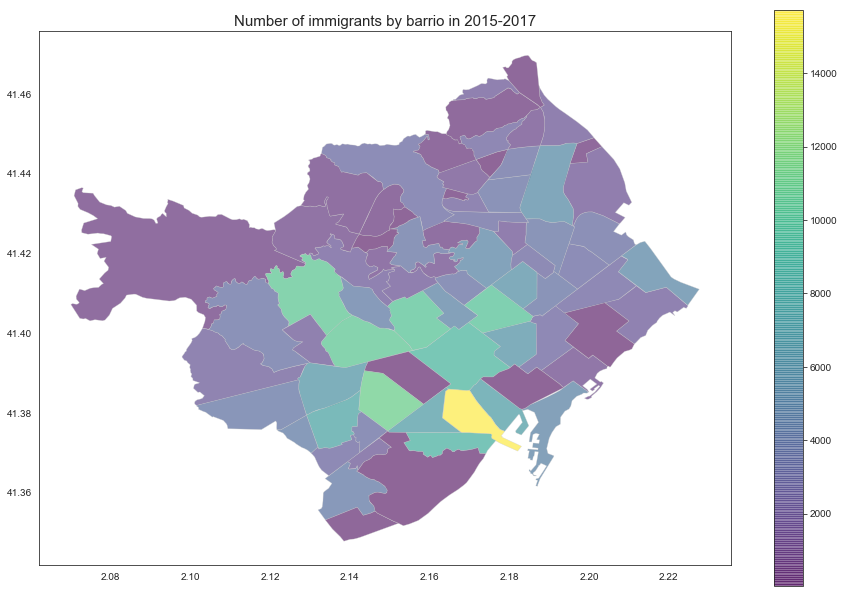

In [555]:
fig=plt.figure(figsize=(12,8))#create a figure object
axes=fig.add_axes([0,0,1,1])
bcn_geopandas_df.plot(column='number_of_immigrants', cmap=palette_style,ax=axes, linewidth=0.5, alpha=0.6, edgecolor='0.8')
#ax.axis('off')
cbar = fig.colorbar(a, orientation='vertical')
axes.set_title('Number of immigrants by barrio in 2015-2017' , fontdict={'fontsize': '15'})